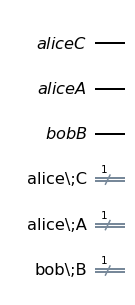

In [1]:
from qiskit import ClassicalRegister,QuantumRegister, QuantumCircuit
q_C = QuantumRegister(1,name='aliceC')
q_A = QuantumRegister(1,name='aliceA')
q_B = QuantumRegister(1,name='bobB')
c_C = ClassicalRegister(1,name='alice C')
c_A = ClassicalRegister(1,name='alice A')
c_B = ClassicalRegister(1,name='bob B')
qc = QuantumCircuit(q_C,q_A,q_B,c_C,c_A,c_B)
qc.draw('mpl')

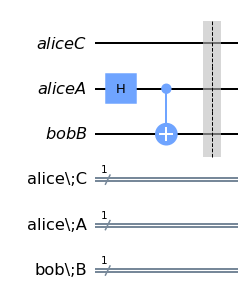

In [2]:
qc.h(q_A[0])
qc.cx(q_A[0],q_B[0])
qc.barrier()
qc.draw('mpl')

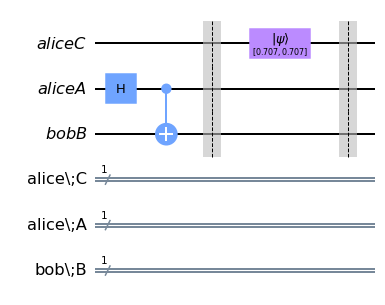

In [3]:
from math import sqrt
ampl=[1/sqrt(2),1/sqrt(2)]
qc.initialize(ampl,q_C[0])
qc.barrier()
qc.draw('mpl')

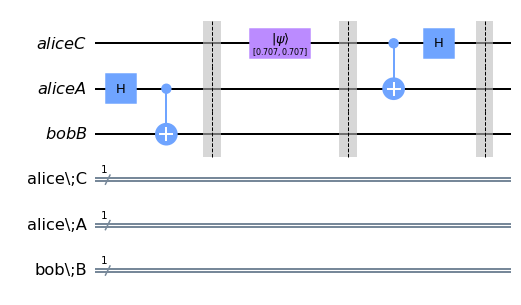

In [4]:
qc.cx(q_C[0],q_A[0])
qc.h(q_C[0])
qc.barrier()
qc.draw('mpl')

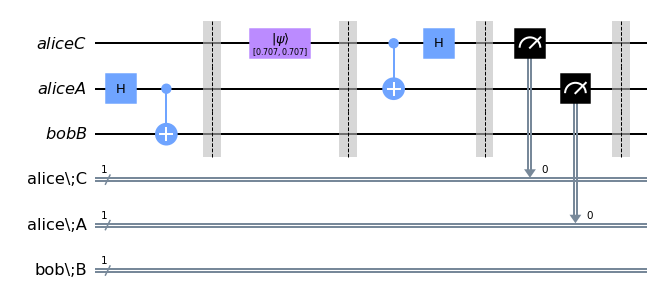

In [5]:
qc.measure(q_C[0],c_C[0])
qc.measure(q_A[0],c_A[0])
qc.barrier()
qc.draw('mpl')

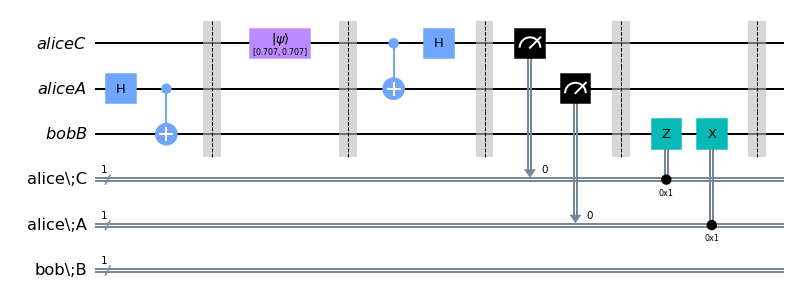

In [6]:
qc.z(q_B[0]).c_if(c_C,1)
qc.x(q_B[0]).c_if(c_A,1)
qc.barrier()
qc.draw('mpl')

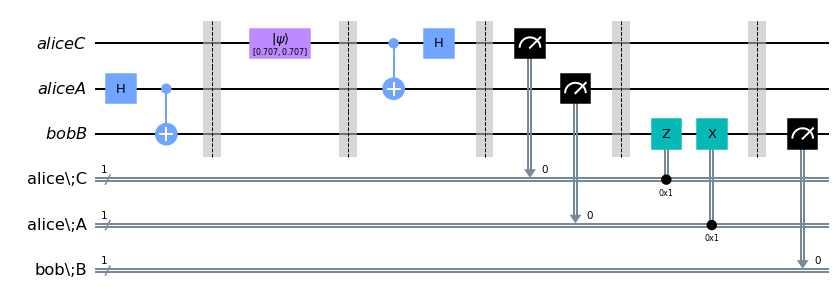

In [7]:
qc.measure(q_B[0],c_B)
qc.draw('mpl')

In [8]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'0 1 0': 115, '0 0 1': 137, '1 0 1': 115, '0 0 0': 139, '0 1 1': 118, '1 1 1': 133, '1 1 0': 138, '1 0 0': 129}


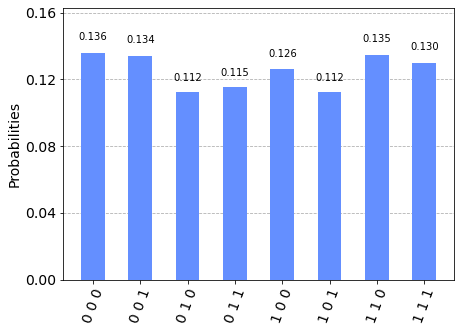

In [9]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [11]:
a = sqrt((counts['0 0 0']+counts['0 0 1']+counts['0 1 0']+counts['0 1 1'])/1024)

In [12]:
a

0.7050321357924049

In [13]:
b = sqrt((counts['1 0 0']+counts['1 0 1']+counts['1 1 0']+counts['1 1 1'])/1024)

In [14]:
b

0.7091753573693885

In [15]:
from qiskit.test.mock import FakeJakarta
device_simulator = FakeJakarta()

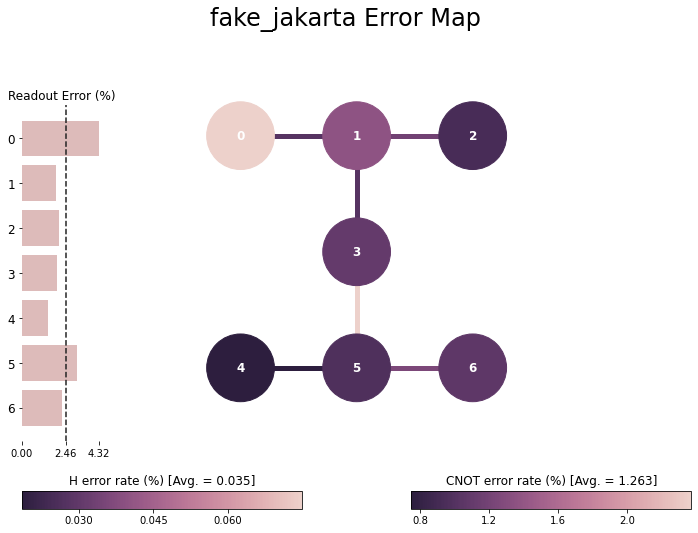

In [16]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulator)

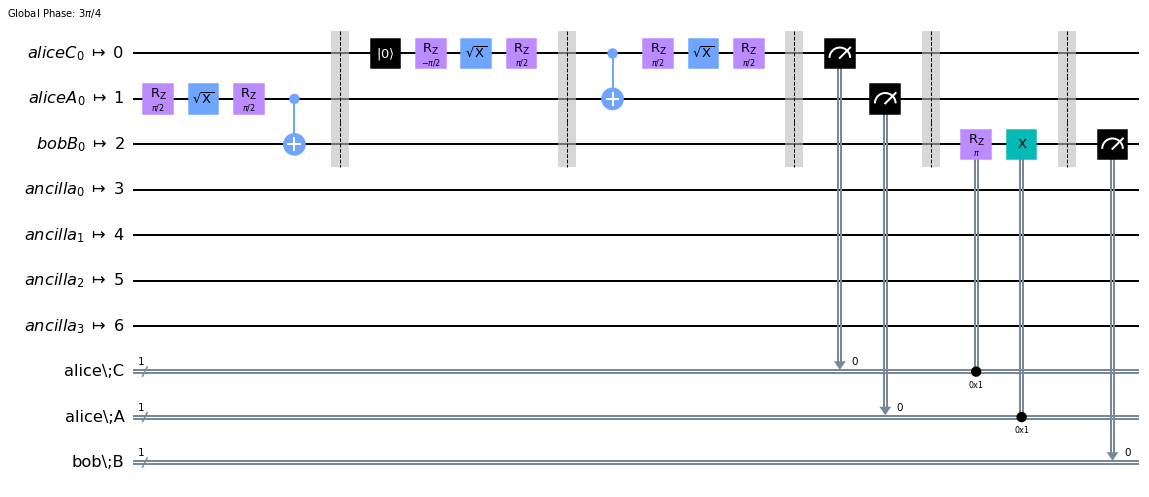

In [17]:
qc_compiled = transpile(qc,device_simulator)
qc_compiled.draw('mpl')

In [18]:
job = device_simulator.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'0 0 1': 121, '0 1 1': 121, '1 1 1': 113, '0 0 0': 161, '0 1 0': 132, '1 0 1': 127, '1 1 0': 118, '1 0 0': 131}


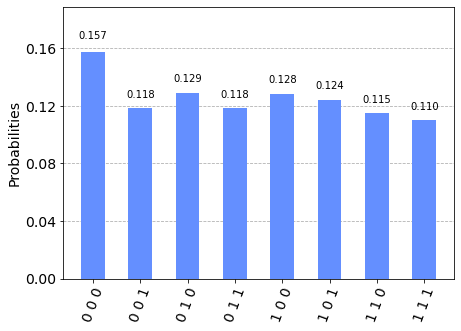

In [19]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [20]:
a = sqrt((counts['0 0 0']+counts['0 0 1']+counts['0 1 0']+counts['0 1 1'])/1024)

In [21]:
a

0.7228145941387736

In [22]:
b = sqrt((counts['1 0 0']+counts['1 0 1']+counts['1 1 0']+counts['1 1 1'])/1024)

In [23]:
b

0.6910420121092494